# Wine Quality

This example uses the Wine Quality dataset to predict the quality of white wine. You can download the Jupyter Notebook of the study <a href="winequality.ipynb">here</a>.

<ul class="ul_content">
    <li><b>fixed acidity</b></li>
    <li><b>volatile acidity</b></li>
    <li><b>citric acid</b></li>
    <li><b>residual sugar</b></li>
    <li><b>total sulfur dioxide</b></li>
    <li><b>free sulfur dioxide</b></li>
    <li><b>density</b></li>
    <li><b>pH</b></li>
    <li><b>sulphates</b></li>
    <li><b>alcohol</b></li>
    <li><b>quality (score between 0 and 10)</b></li>
</ul>

We will follow the data science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) to solve this problem.

## Initialization

This example uses the following version of VerticaPy:

In [10]:
import verticapy as vp
vp.__version__

'0.9.0'

Connect to Vertica. This example uses an existing connection called "VerticaDSN." For details on how to create a connection, use see the <a href="../../connection.php">connection tutorial</a>.

In [2]:
vp.connect("VerticaDSN")

Let's create a Virtual DataFrame of the dataset.

,"123fixed_acidityNumeric(6,3)","123volatile_acidityNumeric(7,4)","123citric_acidNumeric(6,3)","123residual_sugarNumeric(7,3)",123chloridesFloat,"123free_sulfur_dioxideNumeric(7,2)","123total_sulfur_dioxideNumeric(7,2)",123densityFloat,"123pHNumeric(6,3)","123sulphatesNumeric(6,3)",123alcoholFloat,123qualityInt,123goodInt,AbccolorVarchar(20)
1,3.8,0.31,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,0,white
2,3.9,0.225,0.4,4.2,0.03,29.0,118.0,0.989,3.57,0.36,12.8,8,1,white
3,4.2,0.17,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7,1,white
4,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,0,white
5,4.4,0.32,0.39,4.3,0.03,31.0,127.0,0.98904,3.46,0.36,12.8,8,1,white

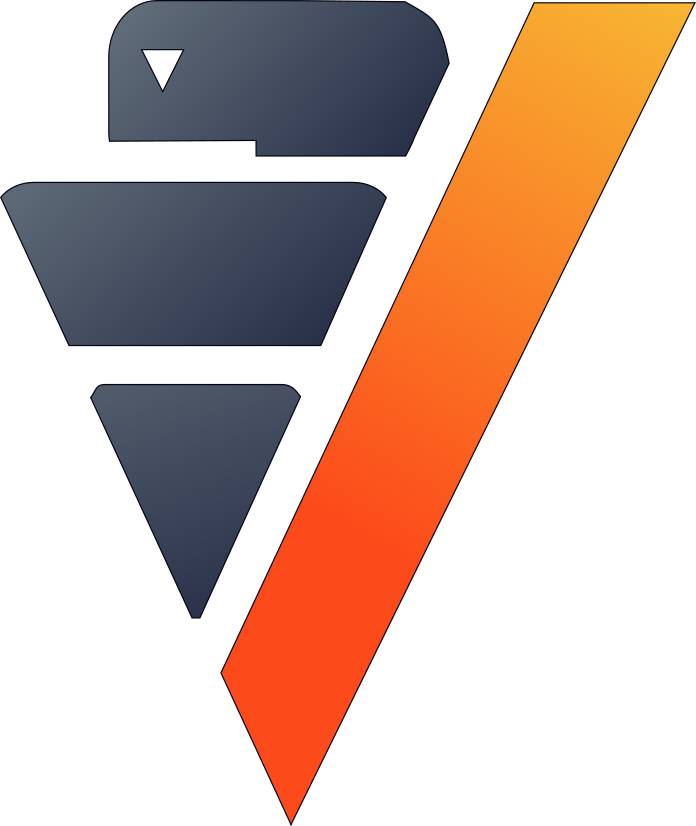

In [3]:
from verticapy.datasets import load_winequality
winequality = load_winequality()
winequality.head(5)

## Data Exploration and Preparation

Let's explore the data by displaying descriptive statistics of all the columns.

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""fixed_acidity""",6497,7.21530706479914,1.29643375779982,3.8,6.4,7.0,7.7,15.9
"""volatile_acidity""",6497,0.339665999692165,0.164636474084679,0.08,0.23,0.29,0.4,1.58
"""citric_acid""",6497,0.318633215330153,0.145317864897591,0.0,0.25,0.31,0.39,1.66
"""residual_sugar""",6497,5.44323533938742,4.75780374314741,0.6,1.8,3.0,8.1,65.8
"""chlorides""",6497,0.0560338617823611,0.0350336013724591,0.009,0.038,0.047,0.065,0.611
"""free_sulfur_dioxide""",6497,30.5253193781746,17.7493997720025,1.0,17.0,29.0,41.0,289.0
"""total_sulfur_dioxide""",6497,115.744574418963,56.5218545226304,6.0,77.0,118.0,156.0,440.0
"""density""",6497,0.994696633831,0.00299867300371915,0.98711,0.99234,0.99489,0.99699,1.03898
"""pH""",6497,3.21850084654456,0.160787202103987,2.72,3.11,3.21,3.32,4.01
"""sulphates""",6497,0.531268277666614,0.14880587361449,0.22,0.43,0.51,0.6,2.0

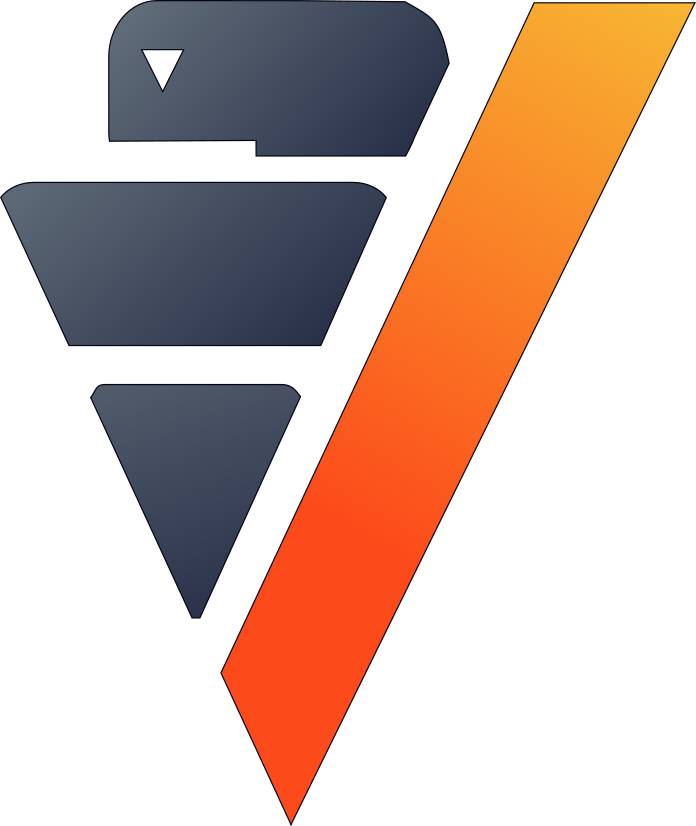

In [4]:
winequality.describe()

The quality of a wine is based on the equilibrium between certain components:
 - For red wines: tannin/smoothness/acidity
 - For white wines: smoothness/acidity
 
Based on this, we don't have the data to create a good model for red wines (the tannins weren't extracted). We do, however, have enough data to make a good model for white wines, so let's filter out red wines from our study.

1599 elements were filtered


,"123fixed_acidityNumeric(6,3)","123volatile_acidityNumeric(7,4)","123citric_acidNumeric(6,3)","123residual_sugarNumeric(7,3)",123chloridesFloat,"123free_sulfur_dioxideNumeric(7,2)","123total_sulfur_dioxideNumeric(7,2)",123densityFloat,"123pHNumeric(6,3)","123sulphatesNumeric(6,3)",123alcoholFloat,123qualityInt
1,3.8,0.31,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6
2,3.9,0.225,0.4,4.2,0.03,29.0,118.0,0.989,3.57,0.36,12.8,8
3,4.2,0.17,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7
4,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3
5,4.4,0.32,0.39,4.3,0.03,31.0,127.0,0.98904,3.46,0.36,12.8,8
6,4.4,0.46,0.1,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,6
7,4.4,0.54,0.09,5.1,0.038,52.0,97.0,0.99022,3.41,0.4,12.2,7
8,4.5,0.19,0.21,0.95,0.033,89.0,159.0,0.99332,3.34,0.42,8.0,5
9,4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2,5
10,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.9908,3.76,0.49,11.3,6

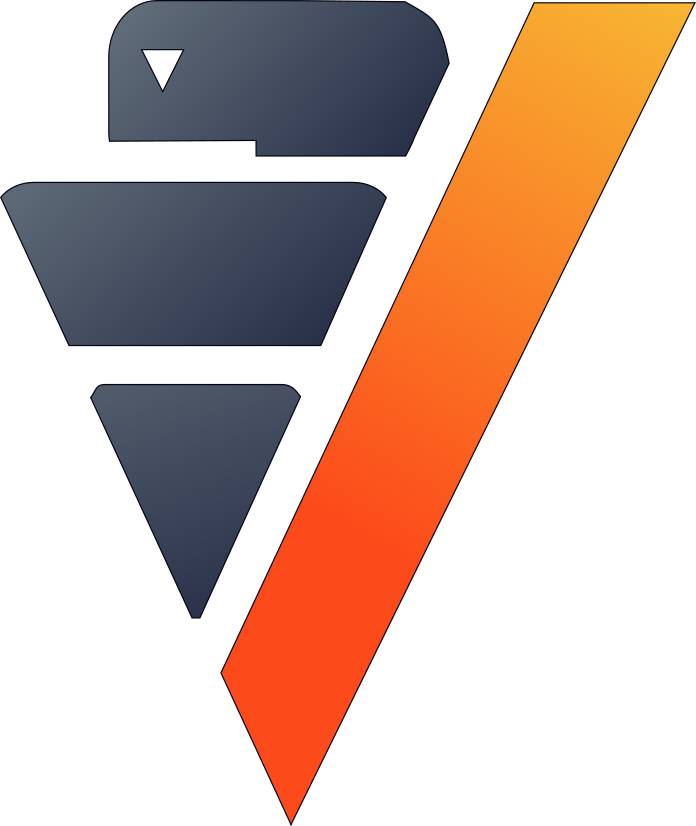

In [5]:
winequality.filter(winequality["color"] == 'white').drop(["good", "color"])

Let's draw the correlation matrix of the dataset.

,"""fixed_acidity""","""volatile_acidity""","""citric_acid""","""residual_sugar""","""chlorides""","""free_sulfur_dioxide""","""total_sulfur_dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
"""fixed_acidity""",1.0,-0.0429534411554621,0.294351955705597,0.101644430364492,0.0900110347529423,-0.0277926483315694,0.109388718710484,0.265711053951591,-0.415781573031458,-0.0141936686269647,-0.103450490979059,-0.0796745702348406
"""volatile_acidity""",-0.0429534411554621,1.0,-0.145406908379083,0.107237277630878,-0.00339782066183659,-0.0833819088988573,0.114748541540603,0.00854780369850073,-0.0449435976968945,-0.0174366686847451,0.0353025244854393,-0.158558078043926
"""citric_acid""",0.294351955705597,-0.145406908379083,1.0,0.0248910326181368,0.0362089188706347,0.0900564485820748,0.0960064563460948,0.0946381002313568,-0.147249625241941,0.0813914907919214,-0.0351334061758074,0.00381493685138116
"""residual_sugar""",0.101644430364492,0.107237277630878,0.0248910326181368,1.0,0.224659958793694,0.345230015537777,0.430103454386088,0.779068758176437,-0.180627450864797,-0.00657339265069306,-0.441559643430315,-0.0923288244199536
"""chlorides""",0.0900110347529423,-0.00339782066183659,0.0362089188706347,0.224659958793694,1.0,0.165469886245389,0.373355118347669,0.505577326845011,-0.0559896819779941,0.0887708062447246,-0.569837905062804,-0.318382425676257
"""free_sulfur_dioxide""",-0.0277926483315694,-0.0833819088988573,0.0900564485820748,0.345230015537777,0.165469886245389,1.0,0.618959642455467,0.329172049904512,-0.00827826694115271,0.0510877316189511,-0.273420456750706,0.00379066722904633
"""total_sulfur_dioxide""",0.109388718710484,0.114748541540603,0.0960064563460948,0.430103454386088,0.373355118347669,0.618959642455467,1.0,0.563857044809788,-0.0130697862621815,0.155569043482336,-0.477228700782309,-0.204178237570967
"""density""",0.265711053951591,0.00854780369850073,0.0946381002313568,0.779068758176437,0.505577326845011,0.329172049904512,0.563857044809788,1.0,-0.11066033283187,0.0921206844814246,-0.821563801759593,-0.357150131425647
"""pH""",-0.415781573031458,-0.0449435976968945,-0.147249625241941,-0.180627450864797,-0.0559896819779941,-0.00827826694115271,-0.0130697862621815,-0.11066033283187,1.0,0.140408175157992,0.148864208230435,0.113164400131828
"""sulphates""",-0.0141936686269647,-0.0174366686847451,0.0813914907919214,-0.00657339265069306,0.0887708062447246,0.0510877316189511,0.155569043482336,0.0921206844814246,0.140408175157992,1.0,-0.0413556773991299,0.0303598456826122

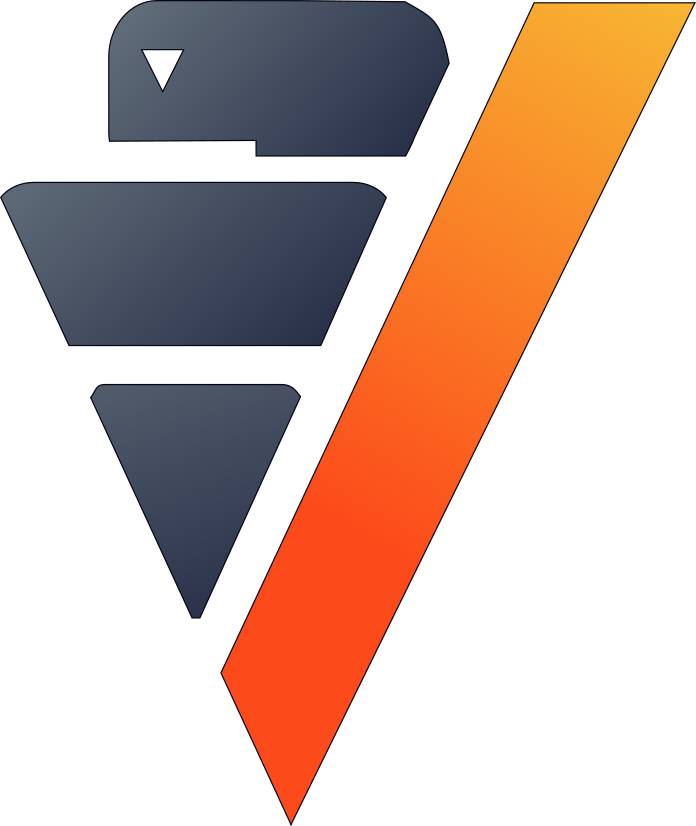

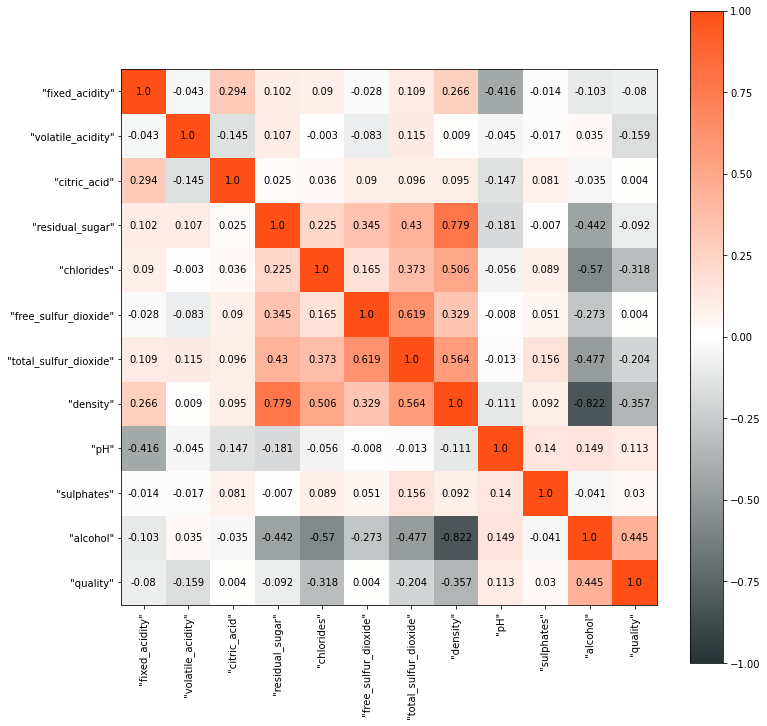

In [6]:
%matplotlib inline
winequality.corr(method = "spearman")

We can see a strong correlation between the density and the alcohol degree (the alcohol degree describes the density of pure ethanol in the wine). We can drop the 'density' column since it doesn't influence the quality of the white wine (instead, its presence will just bias the data).

,"123fixed_acidityNumeric(6,3)","123volatile_acidityNumeric(7,4)","123citric_acidNumeric(6,3)","123residual_sugarNumeric(7,3)",123chloridesFloat,"123free_sulfur_dioxideNumeric(7,2)","123total_sulfur_dioxideNumeric(7,2)","123pHNumeric(6,3)","123sulphatesNumeric(6,3)",123alcoholFloat,123qualityInt
1,3.8,0.31,0.02,11.1,0.036,20.0,114.0,3.75,0.44,12.4,6
2,3.9,0.225,0.4,4.2,0.03,29.0,118.0,3.57,0.36,12.8,8
3,4.2,0.17,0.36,1.8,0.029,93.0,161.0,3.65,0.89,12.0,7
4,4.2,0.215,0.23,5.1,0.041,64.0,157.0,3.42,0.44,8.0,3
5,4.4,0.32,0.39,4.3,0.03,31.0,127.0,3.46,0.36,12.8,8
6,4.4,0.46,0.1,2.8,0.024,31.0,111.0,3.48,0.34,13.1,6
7,4.4,0.54,0.09,5.1,0.038,52.0,97.0,3.41,0.4,12.2,7
8,4.5,0.19,0.21,0.95,0.033,89.0,159.0,3.34,0.42,8.0,5
9,4.6,0.445,0.0,1.4,0.053,11.0,178.0,3.79,0.55,10.2,5
10,4.7,0.145,0.29,1.0,0.042,35.0,90.0,3.76,0.49,11.3,6

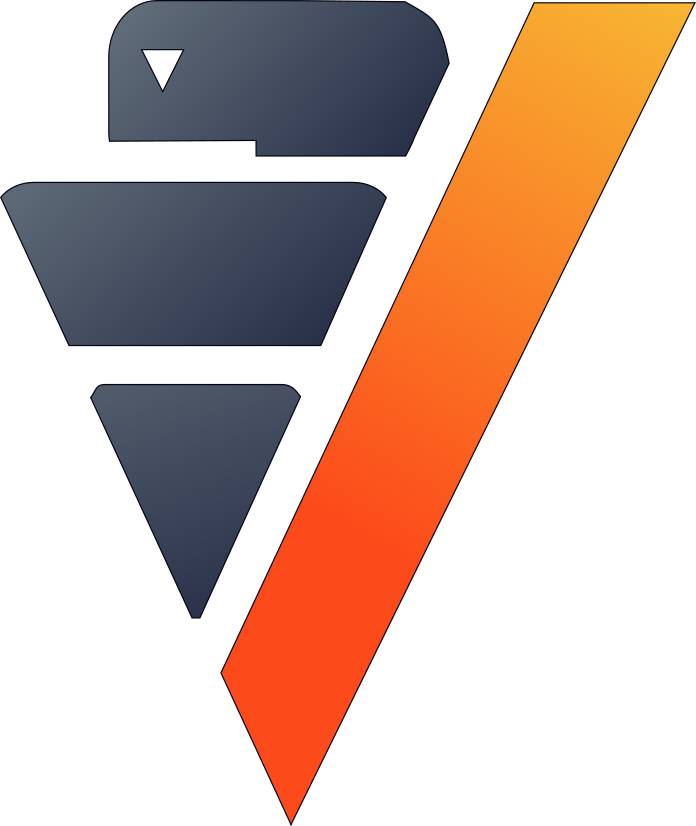

In [7]:
winequality.drop(["density"])

We're working with the scores given by wine tasters, so it's likely that two closely competing wines will have a similar score. Knowing this, a k-nearest neighbors (KNN) model would be best.

KNN is sensitive to unnormalized data so we'll have to normalize our data.

,123fixed_acidityFloat,123volatile_acidityFloat,123citric_acidFloat,123residual_sugarFloat,123chloridesFloat,123free_sulfur_dioxideFloat,123total_sulfur_dioxideFloat,123pHFloat,123sulphatesFloat,123alcoholFloat,123qualityInt
1,-4.046944556859571,0.562075632897163,-3.372453797382976,1.1054154113644201,-0.674490759476594,-0.858442784788394,-0.465166041018341,3.844597329016592,-0.289067468347112,1.34898151895319,6
2,-3.912046404964252,-0.393452943028014,0.89932101263546,-0.18735854429905424,-1.25262569617082,-0.306586708852998,-0.372132832814673,2.630513961958721,-1.059914050606078,1.61877782274383,8
3,-3.507351949278295,-1.011736139214893,0.44966050631773,-0.6370190506167844,-1.34898151895319,3.617723164465374,0.627974155374761,3.170106569539997,4.046944556859571,1.07918521516255,7
4,-3.507351949278295,-0.505868069607446,-1.011736139214893,-0.018735854429905423,-0.192711645564741,1.839520253117987,0.534940947171093,1.618777822743828,-0.289067468347112,-1.61877782274383,3
5,-3.237555645487657,0.674490759476595,0.786905886056028,-0.16862268986914883,-1.25262569617082,-0.183952025311799,-0.16280811435642,1.888574126534466,-1.059914050606078,1.61877782274383,8
6,-3.237555645487657,2.248302531588651,-2.473132784747516,-0.4496605063177302,-1.83076063286504,-0.183952025311799,-0.534940947171093,2.023472278429786,-1.25262569617082,1.82112505058681,6
7,-3.237555645487657,3.147623544224111,-2.585547911326948,-0.018735854429905423,-0.481779113911853,1.103712151870792,-0.860557175883932,1.551328746796169,-0.674490759476595,1.21408336705787,7
8,-3.102657493592338,-0.786905886056028,-1.236566392373758,-0.7962738132709806,-0.963558227823706,3.372453797382976,0.581457551272927,1.079185215162552,-0.481779113911854,-1.61877782274383,5
9,-2.967759341697019,2.079679841719502,-3.597284050541841,-0.7119624683364062,0.963558227823706,-1.41029886072379,1.023365290240351,4.114393632807231,0.770846582258966,-0.13489815189532,5
10,-2.8328611898017,-1.292773955663474,-0.337245379738298,-0.7869058860560278,-0.09635582278237,0.0613173417706,-1.023365290240351,3.912046404964252,0.192711645564741,0.607041683528936,6

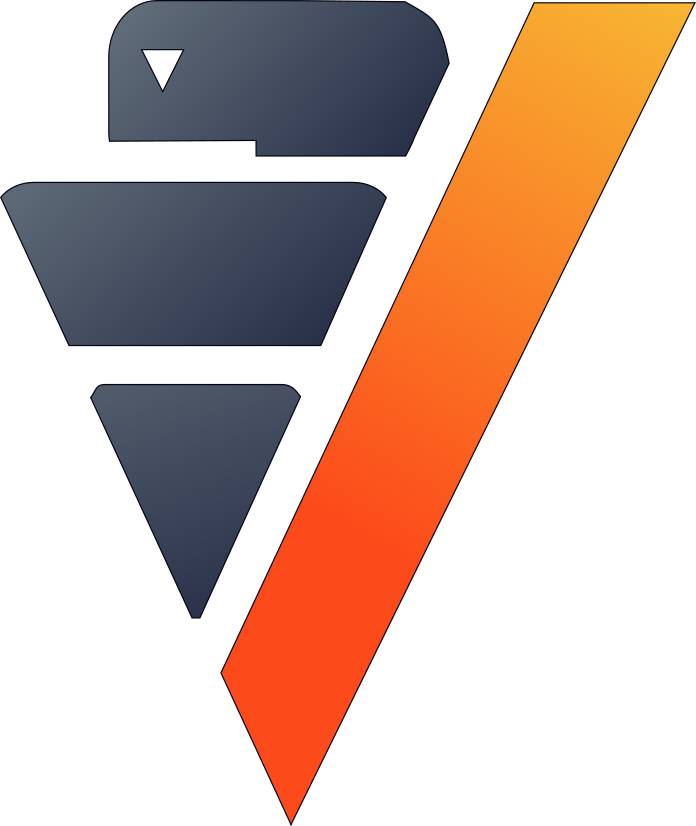

In [8]:
winequality.normalize(["free_sulfur_dioxide", 
                       "residual_sugar", 
                       "pH", 
                       "sulphates", 
                       "volatile_acidity", 
                       "fixed_acidity",
                       "citric_acid",
                       "chlorides",
                       "total_sulfur_dioxide",
                       "alcohol"],
                       method = "robust_zscore")

## Machine Learning

Let's create our KNN model.

,explained_variance,max_error,median_absolute_error,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2,r2_adj,aic,bic,time
1-fold,0.34320264334275,2.76,0.46,0.562748930971289,0.510453023824068,0.7144599525684193,0.343056235772346,0.33901599121990045,-1078.649099958337,-1019.404735145716,0.12743496894836426
2-fold,0.313518521159198,3.38,0.46,0.568897058823529,0.530461274509804,0.7283277246609551,0.312869876969154,0.30863094962164717,-1012.5386180336403,-953.3284041058387,0.13380694389343262
3-fold,0.34557954055378,3.16,0.46,0.563229357798165,0.513766850152905,0.71677531357665,0.345370939235581,0.34133997211264744,-1066.7239828734503,-1007.4932656943286,0.1439499855041504
avg,0.334100235018576,3.1,0.46,0.564958449197661,0.5182270494955923,0.7198543302686748,0.33376568399236034,0.32966230431806504,-1052.6372336218092,-993.4088016486278,0.13506396611531576
std,0.017863863499532662,0.3143246729100343,0.0,0.0034193839829318434,0.010723924538535073,0.007428932194128158,0.018133271254629893,0.018250715933145367,35.234590013761625,35.21788574735633,0.00832895681398358

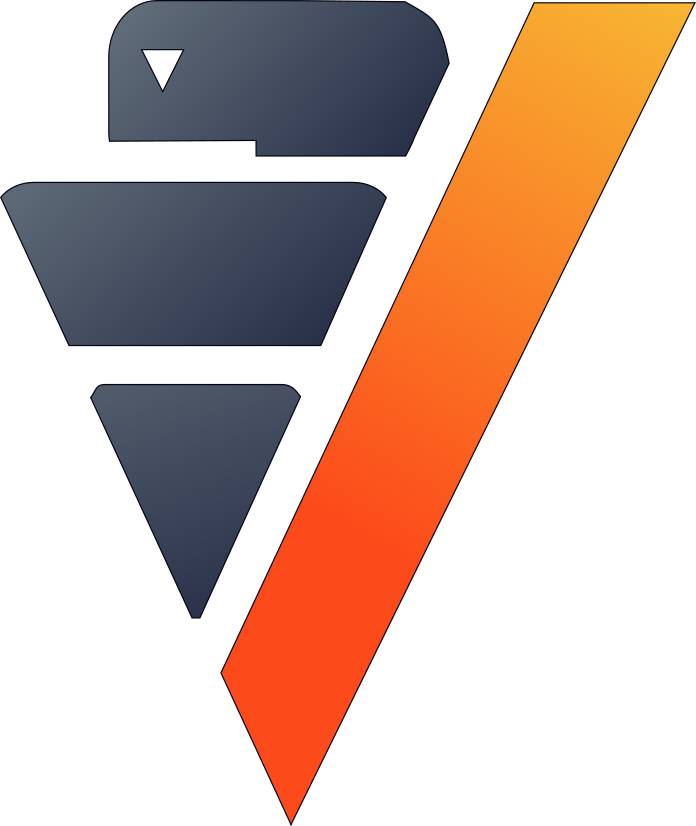

In [9]:
from verticapy.learn.neighbors import KNeighborsRegressor
from verticapy.learn.model_selection import cross_validate

predictors = winequality.get_columns(exclude_columns = ["quality"])
model = KNeighborsRegressor(name = "winequality_KNN", n_neighbors = 50)
cross_validate(model, winequality, predictors, "quality")

Our model is pretty good. Our predicted scores have a median absolute error of less than 0.5. If we want to improve this model, we'll probably need more relevant features.

## Conclusion

We've solved our problem in a Pandas-like way, all without ever loading data into memory!